<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.2 
# *Exploring Data*

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cause plots to be displayed in the notebook:
%matplotlib inline

In [220]:
# Override default figure sizing:
plt.rcParams['figure.figsize'] = (6, 4)
sns.set(color_codes = True)

## Data Profiling

We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.

**Load the file "bikeshare.csv" into a DataFrame named `bikes`, and check that it was loaded properly:**

In [221]:
#ANSWER:
bikes = pd.read_csv('../../DATA/bikeshare.csv', index_col = 0)
bikes.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
instant                                                                   
1        2011-01-01       1   0     1   0        0        6           0   
2        2011-01-01       1   0     1   1        0        6           0   
3        2011-01-01       1   0     1   2        0        6           0   
4        2011-01-01       1   0     1   3        0        6           0   
5        2011-01-01       1   0     1   4        0        6           0   

         weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
instant                                                                      
1                 1  0.24  0.2879  0.81        0.0       3          13   16  
2                 1  0.22  0.2727  0.80        0.0       8          32   40  
3                 1  0.22  0.2727  0.80        0.0       5          27   32  
4                 1  0.24  0.2879  0.75        0.0       3          10   13  
5                 1  0.24  0.2879  0.75        0.0       0           1    1

In [222]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [223]:
bikes.weekday.value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:

**Use `describe` to get the description of datasets.**

In [224]:
#ANSWER:
bikes.describe().T

count        mean         std   min      25%       50%  \
season      17379.0    2.501640    1.106918  1.00   2.0000    3.0000   
yr          17379.0    0.502561    0.500008  0.00   0.0000    1.0000   
mnth        17379.0    6.537775    3.438776  1.00   4.0000    7.0000   
hr          17379.0   11.546752    6.914405  0.00   6.0000   12.0000   
holiday     17379.0    0.028770    0.167165  0.00   0.0000    0.0000   
weekday     17379.0    3.003683    2.005771  0.00   1.0000    3.0000   
workingday  17379.0    0.682721    0.465431  0.00   0.0000    1.0000   
weathersit  17379.0    1.425283    0.639357  1.00   1.0000    1.0000   
temp        17379.0    0.496987    0.192556  0.02   0.3400    0.5000   
atemp       17379.0    0.475775    0.171850  0.00   0.3333    0.4848   
hum         17379.0    0.627229    0.192930  0.00   0.4800    0.6300   
windspeed   17379.0    0.190098    0.122340  0.00   0.1045    0.1940   
casual      17379.0   35.676218   49.305030  0.00   4.0000   17.0000   
registered  17379.0  153.786869  151.357286  0.00  34.0000  115.0000   
cnt         17379.0  189.463088  181.387599  1.00  40.0000  142.0000   

                 75%       max  
season        3.0000    4.0000  
yr            1.0000    1.0000  
mnth         10.0000   12.0000  
hr           18.0000   23.0000  
holiday       0.0000    1.0000  
weekday       5.0000    6.0000  
workingday    1.0000    1.0000  
weathersit    2.0000    4.0000  
temp          0.6600    1.0000  
atemp         0.6212    1.0000  
hum           0.7800    1.0000  
windspeed     0.2537    0.8507  
casual       48.0000  367.0000  
registered  220.0000  886.0000  
cnt         281.0000  977.0000

### Continuous Data

We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).

**Use the `scatter` method of Pandas to create a scatter plot of `windspeed`, `temp`:**

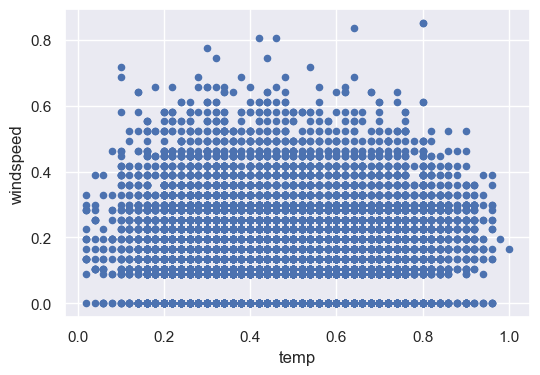

In [225]:
#ANSWER

# Pandas plotting
bikes.plot('temp', 'windspeed', kind='scatter'); #or bikes.plot.scatter('temp', 'windspeed')

# Matplotlib plotting
#plt.scatter('temp', 'windspeed', data=bikes);

The plot shows that

* the windspeed at value 0 is nan

* the data is already scaled

**The `scatter` method has various parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:**

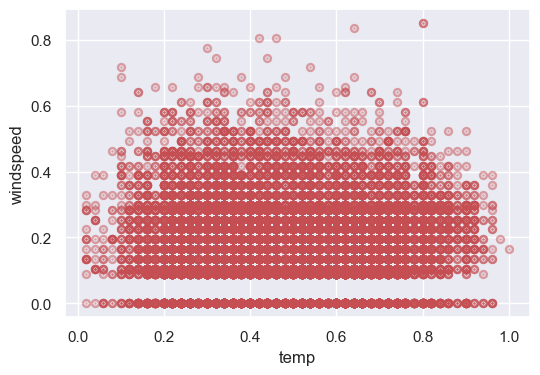

In [226]:
#ANSWER
bikes.plot.scatter('temp', 'windspeed', s=3, alpha=0.5, c='r', linewidths=5);

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for: 

> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. <sup>[1](#histfootnote)</sup>

- **Identify continuous varaibles**
- **Create histogram for those variables**

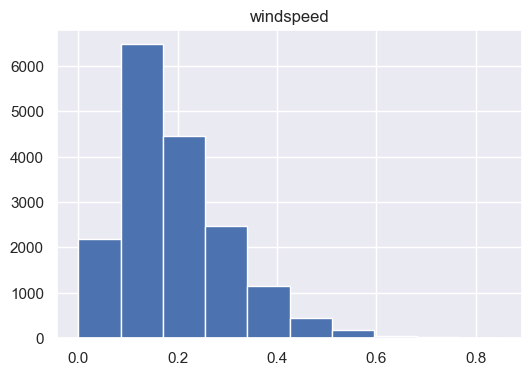

In [227]:
#ANSWER

#bins=int(np.round(np.sqrt(len(bikes))))

# Pandas plotting
bikes.hist('windspeed', bins=10);

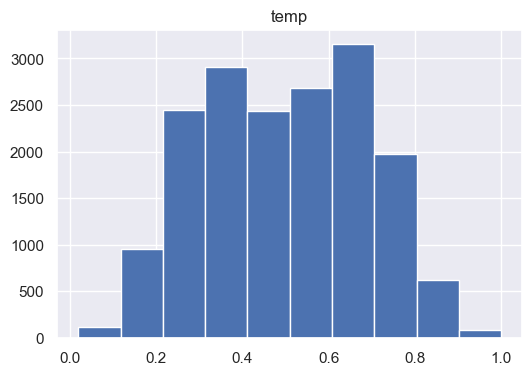

In [228]:
bikes.hist('temp', bins=10);

What do the horizontal and vertical axes represent?

#### ANSWER: 
    horiz = magnitude of `atemp`, apparently normalised to [0, 1], discretised into bins of width 0.1; 
    vertical = counts of samples in each bin.

*NOTE: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:

**Make a box and whisker plot for the column ``atemp``.**  

> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.

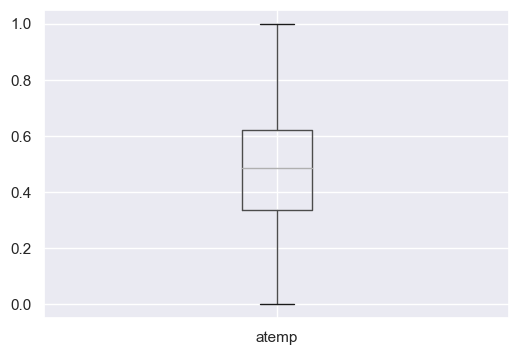

In [229]:
#ANSWER

# Pandas plotting
bikes.boxplot('atemp'); 

> No outliers

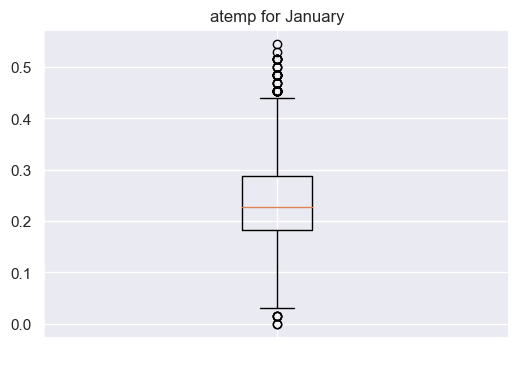

In [230]:
# Check individual month for outliers, here January

# Matplotlib plotting
jan = bikes[bikes.mnth == 1]
plt.boxplot(jan.atemp, labels=' ')
plt.title('atemp for January');

> Multiple outliers

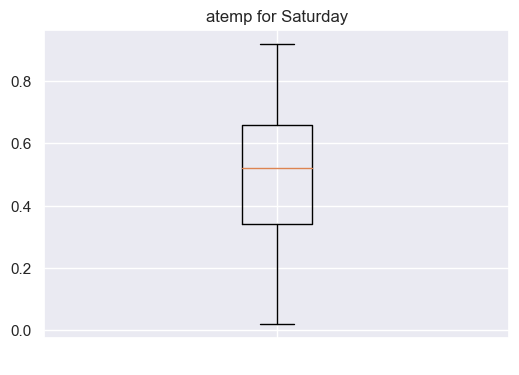

In [231]:
# Check individual weekdays for outliers, here Saturday
sat = bikes[bikes.weekday == 1]
plt.boxplot(sat.temp, labels=' ')
plt.title('atemp for Saturday');

> No outliers

This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges). 

**Plot `atemp` and `windspeed` together. Change labels accordingly.**

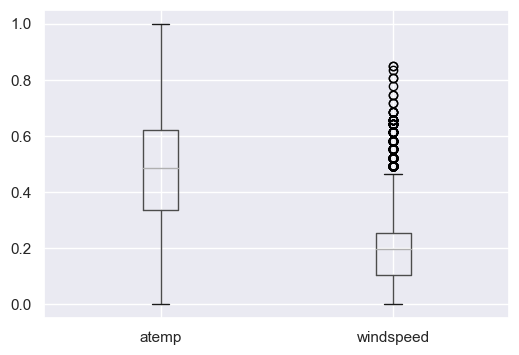

In [232]:
#ANSWER

# Pandas plotting
bikes.boxplot(['atemp', 'windspeed']);

# plt plotting
#plt.boxplot([bikes.atemp, bikes.windspeed], labels=['atemp', 'windspeed']);

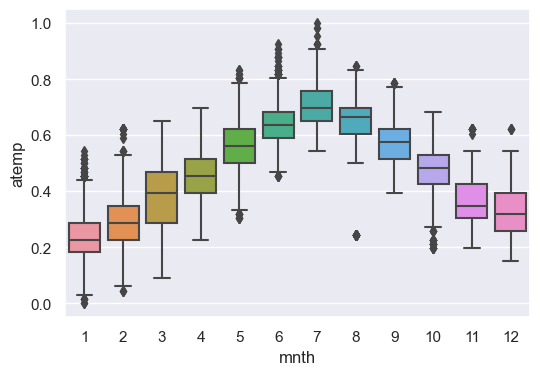

In [233]:
# Seaborn allows x vs y plotting
sns.boxplot(x='mnth', y='atemp', data=bikes);

### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous "Iris" dataset gets loaded from the UCI repository:

In [234]:
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = "http://goo.gl/HppjFh" 
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris = pd.read_csv(raw_data, delimiter = ",",
                   names = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).

**Print the first few rows of this DataFrame:**

In [235]:
#ANSWER
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In this dataset, `species` has several possible values (representing the classes of the samples).

**Find out distinct number of `species` and number of sample for each `species` in this dataset.**

In [236]:
#ANSWER
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [237]:
#ANSWER
iris.species.nunique() #or: len(iris.species.value_counts())

3

We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`. 

**Apply the `groupby` method to get `mean` of `sepal_length` and `sepal_width` for the above dataset.**

In [238]:
#ANSWER 
iris.groupby(by='species').mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

In [239]:
iris.groupby(by='species').agg({'sepal_length': 'mean', 'sepal_width': 'mean'})

sepal_length  sepal_width
species                                   
Iris-setosa             5.006        3.418
Iris-versicolor         5.936        2.770
Iris-virginica          6.588        2.974

The Pandas `plot` method provides a quick way to produce a scatter plot.

**Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.**

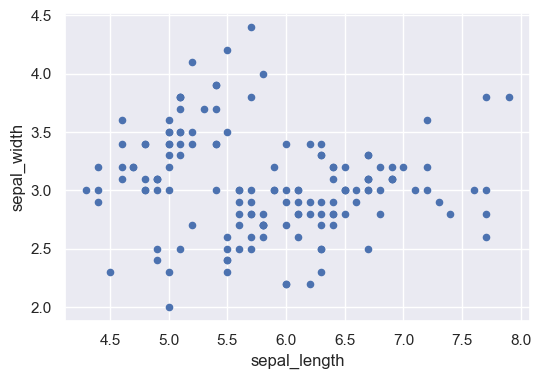

In [240]:
#ANSWER

# Pandas plotting
iris.plot(x='sepal_length', y='sepal_width', kind='scatter'); #or iris_data.plot.scatter('sepal_length', 'sepal_width')

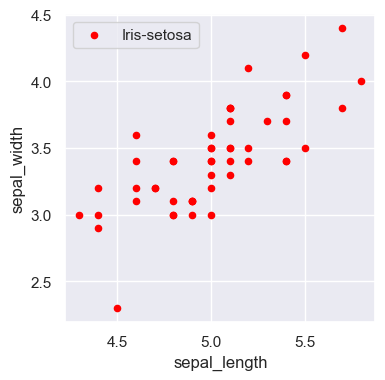

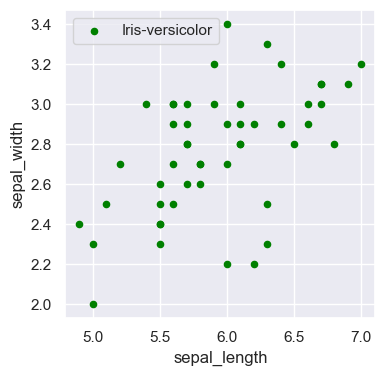

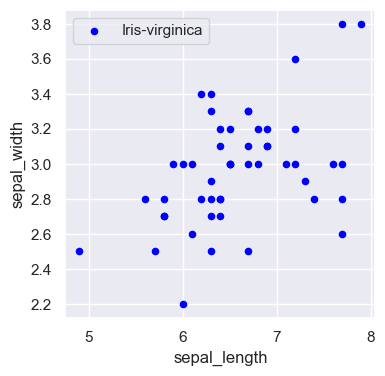

In [241]:
#ANSWER
# Colored by species using pandas plot method

colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
grouped = iris.groupby('species')

for key, group in grouped:
    group.plot('sepal_length', 'sepal_width', kind='scatter', label=key, color=colors[key], figsize=(4,4)); #or iris_data.plot.scatter('sepal_length', 'sepal_width')

**Draw a Barplot showing sepal width and length using the Pandas plot method.**

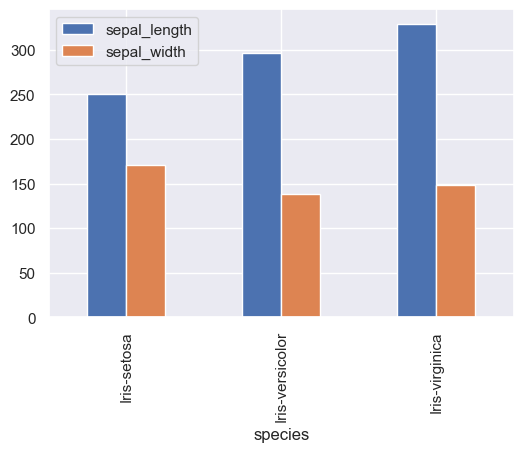

In [242]:
#ANSWER

# Plot sum of sepal width and length 
iris_sum = iris.groupby(by='species').agg({'sepal_length': 'sum', 'sepal_width': 'sum'})
iris_sum.plot.bar();

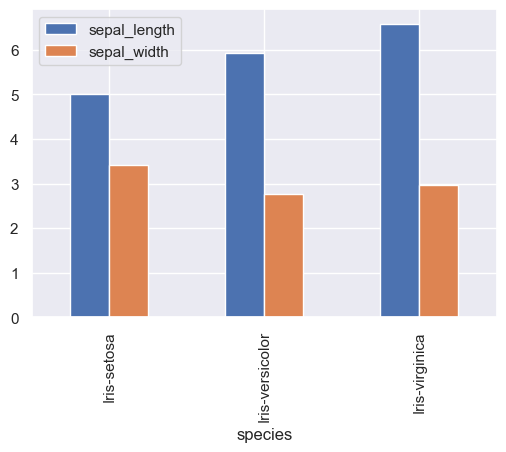

In [243]:
# Mean sepal width and length
iris_mean = iris.groupby(by='species').agg({'sepal_length': 'mean', 'sepal_width': 'mean'})
iris_mean.plot(kind='bar');

Draw a Scatterplot showing sepal width and length using the Pandas plot method.

**[BONUS] Set `title`, `xlabel`, `ylabel` to the plot**

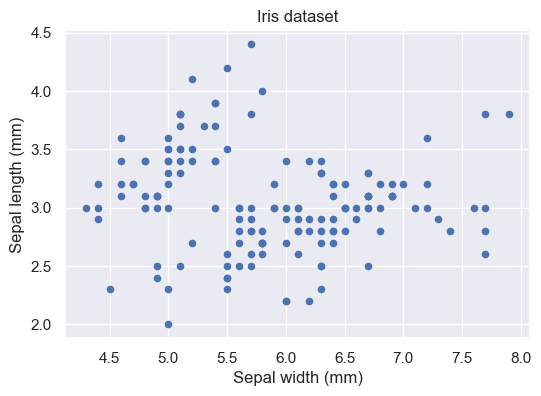

In [244]:
#ANSWER

# Pandas plotting
iris.plot('sepal_length', 'sepal_width', kind='scatter') 
#or iris.plot.scatter('sepal_length', 'sepal_width')
#or plt.scatter(iris.sepal_length, iris.sepal_width, s=10, alpha=0.5, linewidths=3)

plt.xlabel('Sepal width (mm)')
plt.ylabel('Sepal length (mm)')
plt.title('Iris dataset');

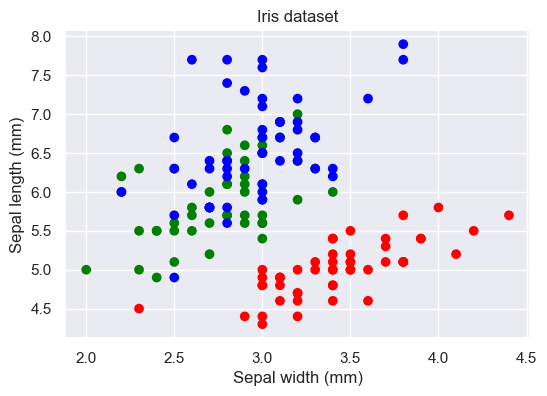

In [245]:
#ANSWER

# Optional
# Colored by species using matplotlib
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}

plt.scatter(x='sepal_width' , y='sepal_length', data=iris, c=iris.species.map(colors))
plt.xlabel('Sepal width (mm)')
plt.ylabel('Sepal length (mm)')
plt.title('Iris dataset');

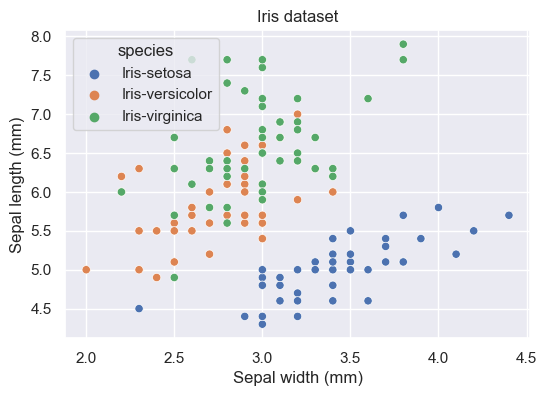

In [246]:
#ANSWER

# Optional
# Colored by species using seaborn
sns.scatterplot(x='sepal_width' , y='sepal_length', data=iris, hue='species')

plt.xlabel('Sepal width (mm)')
plt.ylabel('Sepal length (mm)')
plt.title('Iris dataset');

In this dataset we have also `petal_width`, `petal_length`. 

**Try to draw Scatterplot using these variables.**

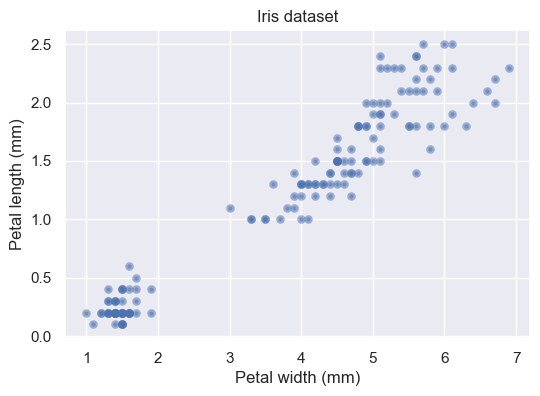

In [247]:
#ANSWER

# plt plotting
plt.scatter(iris['petal_length'], iris['petal_width'], s=10, alpha=0.5, linewidths=3)
plt.xlabel('Petal width (mm)')
plt.ylabel('Petal length (mm)')
plt.title('Iris dataset');

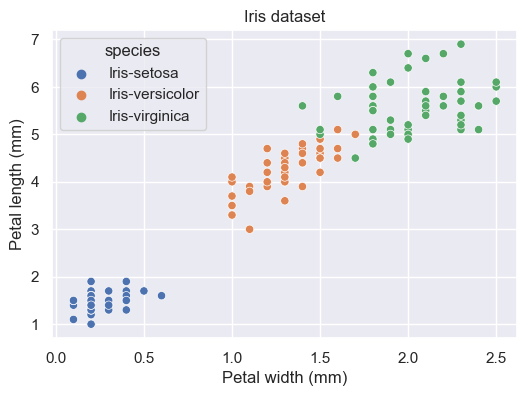

In [248]:
#ANSWER

# Optional
# Colored by species using seaborn
sns.scatterplot(x='petal_width' , y='petal_length', data=iris, hue='species')

plt.xlabel('Petal width (mm)')
plt.ylabel('Petal length (mm)')
plt.title('Iris dataset');

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the Seaborn library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg = False`.

**Draw a Scatterplot showing sepal width and length.**

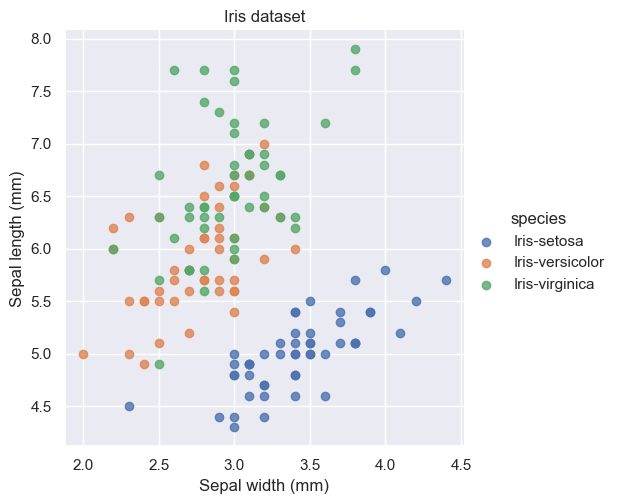

In [249]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:

# Using seaborn
sns.lmplot(x='sepal_width' , y='sepal_length', data=iris, hue='species',fit_reg = False)

plt.xlabel('Sepal width (mm)')
plt.ylabel('Sepal length (mm)')
plt.title('Iris dataset'); 

**[BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.**

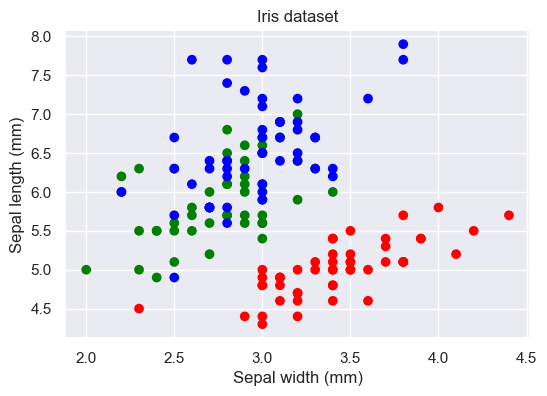

In [250]:
# ANSWER

# As above:
# Colored by species using matplotlib
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}

plt.scatter(x='sepal_width' , y='sepal_length', data=iris, c=iris.species.map(colors))
plt.xlabel('Sepal width (mm)')
plt.ylabel('Sepal length (mm)')
plt.title('Iris dataset');

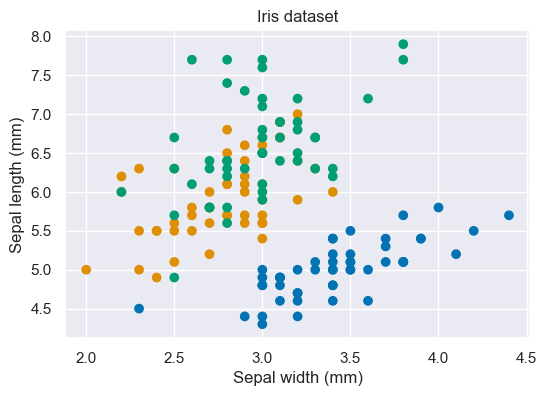

In [251]:
# ANSWER
# Alternatively:

# Unique category labels: species
color_labels = iris.species.unique()

# List of RGB triplets
rgb_values = sns.color_palette('colorblind', 6)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x='sepal_width' , y='sepal_length', data=iris, c=iris.species.map(color_map))
plt.xlabel('Sepal width (mm)')
plt.ylabel('Sepal length (mm)')
plt.title('Iris dataset');

In [252]:
rgb_values

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451)]

To find out why this function is called `lmplot`, try it again with `fit_reg` = True:

**Draw a Scatterplot showing sepal width and length:**

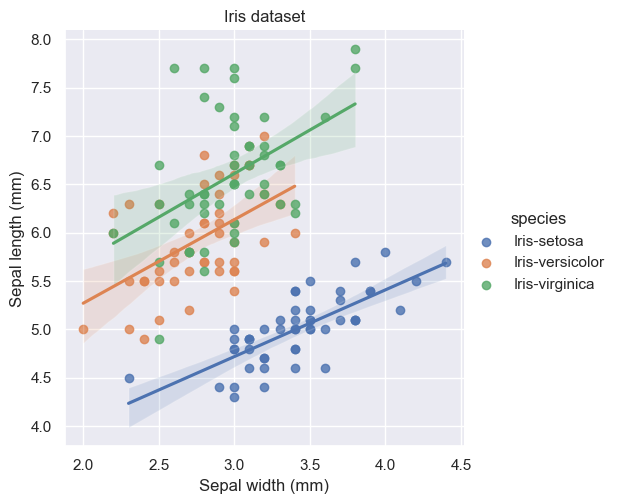

In [253]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:

# Using seaborn
sns.lmplot(x='sepal_width' , y='sepal_length', data=iris, hue='species',fit_reg = True)

plt.xlabel('Sepal width (mm)')
plt.ylabel('Sepal length (mm)')
plt.title('Iris dataset');

The Seaborn `jointplot` function charts a correlation along with both distributions:

**Draw a jointplot showing sepal width and length:**

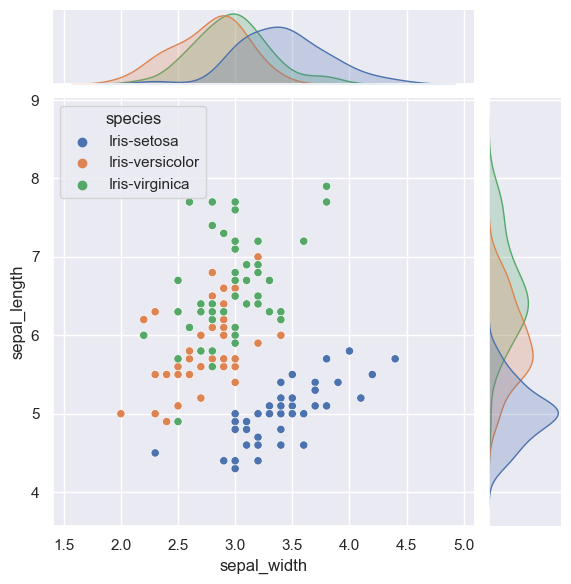

In [254]:
# ANSWER
sns.jointplot(x='sepal_width' , y='sepal_length', data=iris, hue='species');

When we want to see all the correlations at once, we can use `pairplot`:

**Draw a `pairplot` of the dataset:**

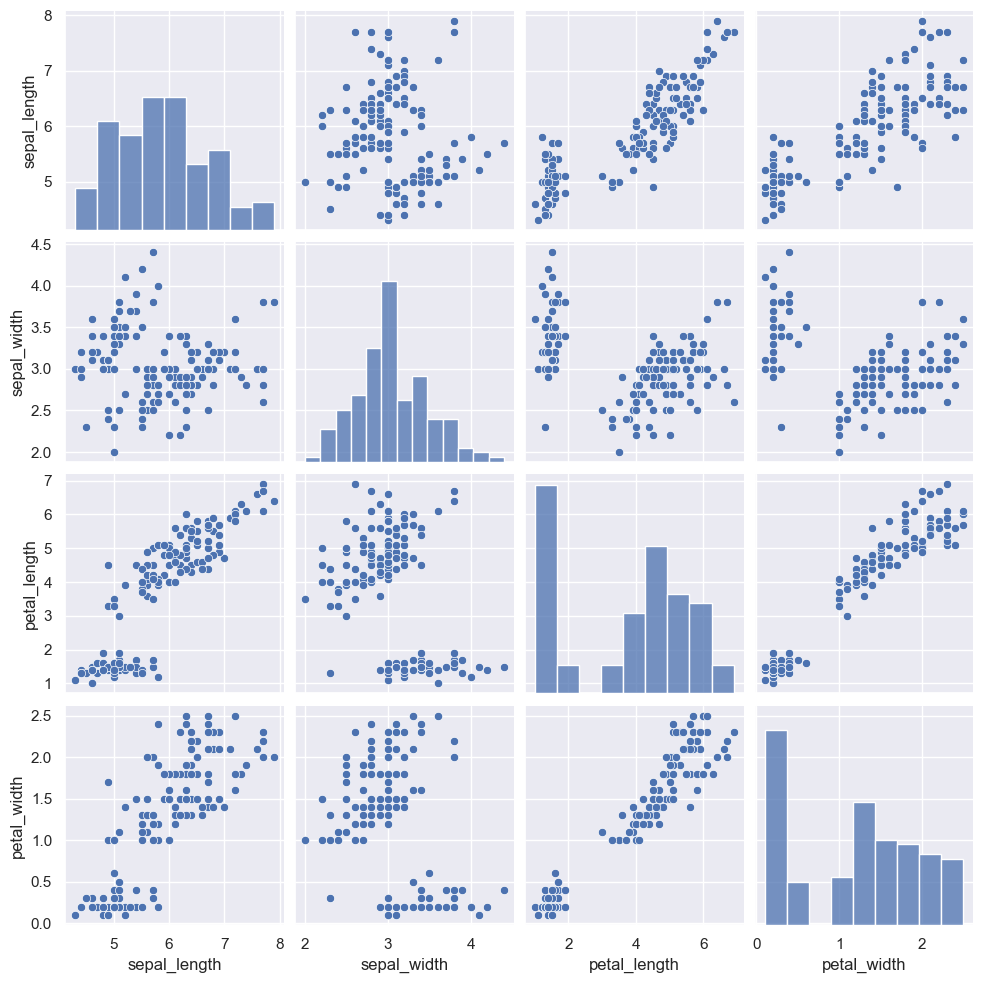

In [255]:
# ANSWER
sns.pairplot(iris);

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

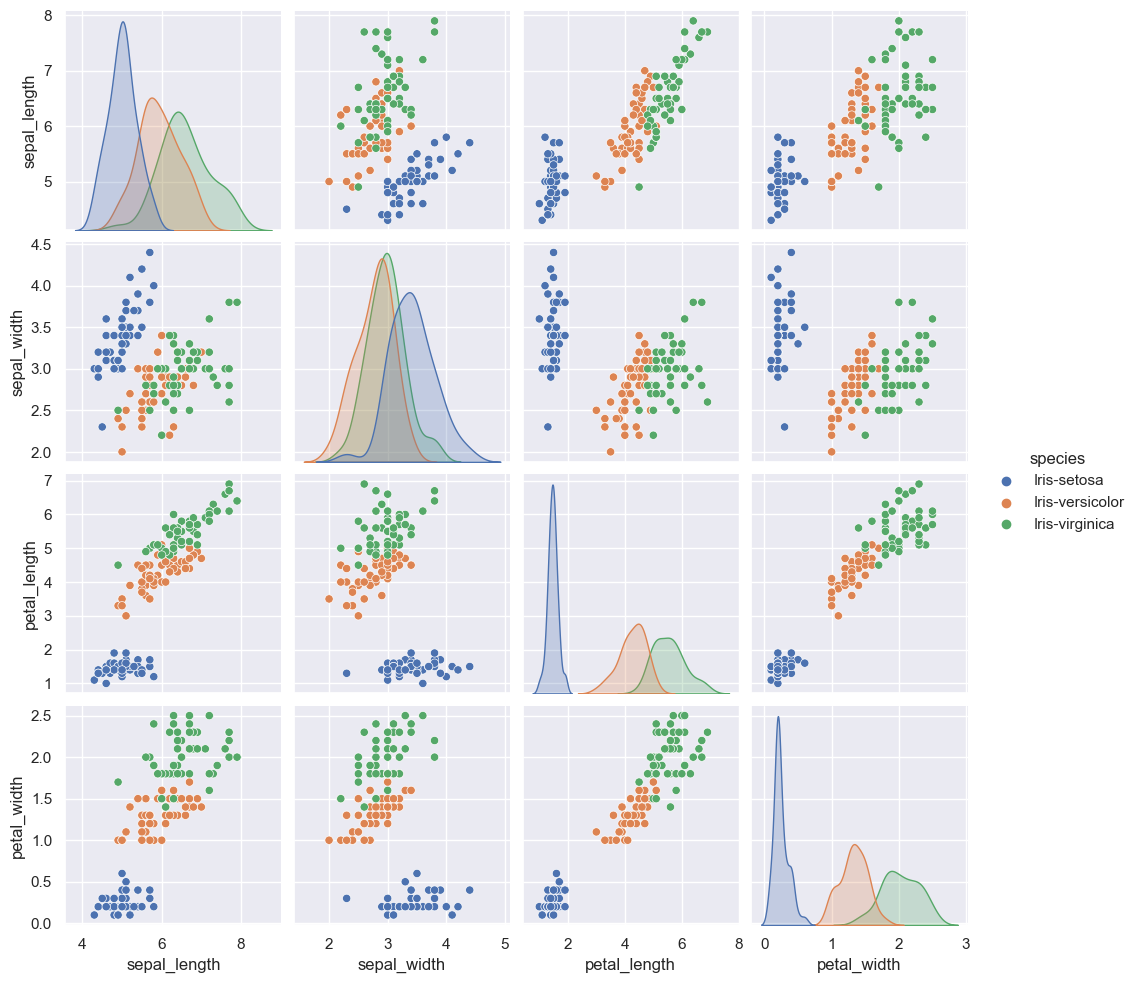

In [256]:
# ANSWER
sns.pairplot(iris, hue='species');

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [257]:
# ANSWER
iris.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:

> pip install sweetviz

#### SweetViz

In [258]:
# ANSWER
import sweetviz as sv
df = pd.read_csv("../../DATA/Meteorite_Landings.csv", parse_dates = ['year'], encoding = 'UTF-8')
df.head(10)

name   id nametype     recclass  mass (g)  fall  \
0               Aachen    1    Valid           L5      21.0  Fell   
1               Aarhus    2    Valid           H6     720.0  Fell   
2                 Abee    6    Valid          EH4  107000.0  Fell   
3             Acapulco   10    Valid  Acapulcoite    1914.0  Fell   
4              Achiras  370    Valid           L6     780.0  Fell   
5             Adhi Kot  379    Valid          EH4    4239.0  Fell   
6  Adzhi-Bogdo (stone)  390    Valid        LL3-6     910.0  Fell   
7                 Agen  392    Valid           H5   30000.0  Fell   
8               Aguada  398    Valid           L6    1620.0  Fell   
9        Aguila Blanca  417    Valid            L    1440.0  Fell   

                     year    reclat    reclong               GeoLocation  
0  01/01/1880 12:00:00 AM  50.77500    6.08333     (50.775000, 6.083330)  
1  01/01/1951 12:00:00 AM  56.18333   10.23333    (56.183330, 10.233330)  
2  01/01/1952 12:00:00 AM  54.21667 -113.00000  (54.216670, -113.000000)  
3  01/01/1976 12:00:00 AM  16.88333  -99.90000   (16.883330, -99.900000)  
4  01/01/1902 12:00:00 AM -33.16667  -64.95000  (-33.166670, -64.950000)  
5  01/01/1919 12:00:00 AM  32.10000   71.80000    (32.100000, 71.800000)  
6  01/01/1949 12:00:00 AM  44.83333   95.16667    (44.833330, 95.166670)  
7  01/01/1814 12:00:00 AM  44.21667    0.61667     (44.216670, 0.616670)  
8  01/01/1930 12:00:00 AM -31.60000  -65.23333  (-31.600000, -65.233330)  
9  01/01/1920 12:00:00 AM -30.86667  -64.55000  (-30.866670, -64.550000)

Use `analyze` of `sweetviz` to get the overview of the dataset.

In [259]:
# ANSWER
report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [260]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Use Pandas Profiling

In [261]:
from pandas_profiling import ProfileReport

In [262]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

For **HOMEWORK**: check out the `pydqc` library.

## Part 2: Time Series and Geospatial Data

## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [263]:
airpass = pd.read_csv('../../DATA/AirPassengers.csv')
#airpass = pd.read_csv('../../DATA/AirPassengers.csv', index_col=0)
airpass.head()

TravelDate  Passengers
0   1/1/1949         112
1   2/1/1949         118
2   3/1/1949         132
3   4/1/1949         129
4   5/1/1949         121

In [264]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Before going any further, the `TravelDate` column needs to be converted to the `datetime` type.

> **Check out Time / Date formatting on https://strftime.org/**

In [265]:
# ANSWER
airpass['TravelDate'] = pd.to_datetime(airpass.TravelDate) #default: format='%m/%d/%Y'
airpass.head()

TravelDate  Passengers
0 1949-01-01         112
1 1949-02-01         118
2 1949-03-01         132
3 1949-04-01         129
4 1949-05-01         121

In [266]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TravelDate  144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Set `TravelDate` as index

In [267]:
# ANSWER
airpass.set_index('TravelDate', inplace=True)

Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

Use `head` to check.

In [268]:
# ANSWER
airpass.head()

Passengers
TravelDate            
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Here's how to see the values of the index:

In [269]:
airpass.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='TravelDate', length=144, freq=None)

In [270]:
airpass.index.min(), airpass.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [271]:
print(f'Time frame covered in dataset:', airpass.index.max() - airpass.index.min())

Time frame covered in dataset: 4352 days 00:00:00


In [272]:
airpass.describe().T

count        mean         std    min    25%    50%    75%    max
Passengers  144.0  280.298611  119.966317  104.0  180.0  265.5  360.5  622.0

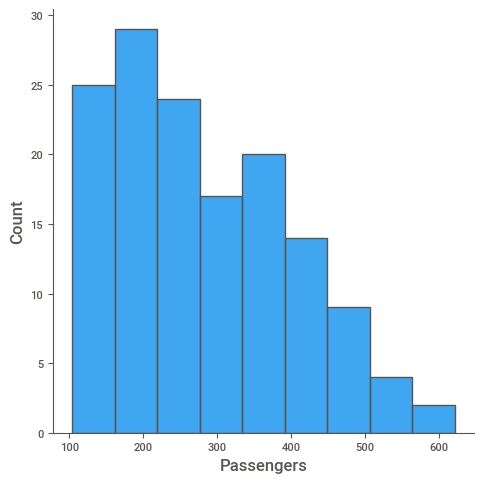

In [273]:
sns.displot(airpass['Passengers']);

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [274]:
ts = airpass['Passengers'] #ts: time series
ts

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

We use the datetime index exactly like a row number index:

In [275]:
print(ts['1949-02-01'])

118


Or, we can refer to the row by its datetime equivalent:

In [276]:
from datetime import datetime
print(ts[datetime(1949,2,1)])

118


Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [277]:
print(ts['1949'])

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


The most basic way to plot a time series is to let Pandas apply the default:

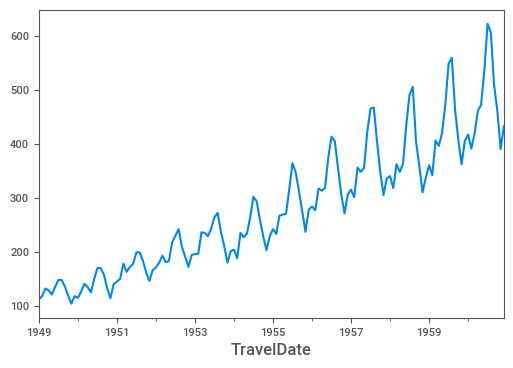

In [278]:
ts.plot(); #ts.plot(kind='line')

> Plot shows seasonality and trend

## Geospatial Data

Geospatial data is map-based (although what constitutes a "map" can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use folium for its breadth and its use of open-source data.

In [279]:
import folium

In [280]:
# Read SF Incidents data
crime_csv = '../../DATA/SFPD_Incidents-Current_Year_2015.csv'
df = pd.read_csv(crime_csv)
df.head()

IncidntNum      Category                         Descript DayOfWeek  \
0   150827188  NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED    Sunday   
1   150827213       ASSAULT      INFLICT INJURY ON COHABITEE    Sunday   
2   150827213       ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE    Sunday   
3   150827213       ASSAULT           CHILD ABUSE (PHYSICAL)    Sunday   
4   150827213       ASSAULT              MAYHEM WITH A KNIFE    Sunday   

         Date   Time PdDistrict      Resolution                   Address  \
0  09/20/2015  23:54   RICHMOND       UNFOUNDED  3000 Block of CLEMENT ST   
1  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
2  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
3  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
4  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   

            X          Y                               Location  
0 -122.491851  37.781756  (37.7817557255921, -122.491851328976)  
1 -122.413676  37.712617  (37.7126165766239, -122.413676487435)  
2 -122.413676  37.712617  (37.7126165766239, -122.413676487435)  
3 -122.413676  37.712617  (37.7126165766239, -122.413676487435)  
4 -122.413676  37.712617  (37.7126165766239, -122.413676487435)

Convert `Date` Column to DateTime and set as index 

In [281]:
# ANSWER
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112331 entries, 0 to 112330
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  112331 non-null  int64  
 1   Category    112331 non-null  object 
 2   Descript    112331 non-null  object 
 3   DayOfWeek   112331 non-null  object 
 4   Date        112331 non-null  object 
 5   Time        112331 non-null  object 
 6   PdDistrict  112331 non-null  object 
 7   Resolution  112331 non-null  object 
 8   Address     112331 non-null  object 
 9   X           112331 non-null  float64
 10  Y           112331 non-null  float64
 11  Location    112331 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 10.3+ MB


In [282]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

IncidntNum      Category                         Descript  \
Date                                                                    
2015-09-20   150827188  NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED   
2015-09-20   150827213       ASSAULT      INFLICT INJURY ON COHABITEE   
2015-09-20   150827213       ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE   
2015-09-20   150827213       ASSAULT           CHILD ABUSE (PHYSICAL)   
2015-09-20   150827213       ASSAULT              MAYHEM WITH A KNIFE   

           DayOfWeek   Time PdDistrict      Resolution  \
Date                                                     
2015-09-20    Sunday  23:54   RICHMOND       UNFOUNDED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   

                             Address           X          Y  \
Date                                                          
2015-09-20  3000 Block of CLEMENT ST -122.491851  37.781756   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   

                                         Location  
Date                                               
2015-09-20  (37.7817557255921, -122.491851328976)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)

In [283]:
print('Time frame of SFPD incident report:', df.index.max() - df.index.min())

Time frame of SFPD incident report: 261 days 00:00:00


Draw a timeseries plot to visualize number of crimes for each day.

In [284]:
df.groupby(df.index).size()

Date
2015-01-02    395
2015-01-03    428
2015-01-04    325
2015-01-05    449
2015-01-06    407
             ... 
2015-09-16    413
2015-09-17    403
2015-09-18    390
2015-09-19    421
2015-09-20    392
Length: 262, dtype: int64

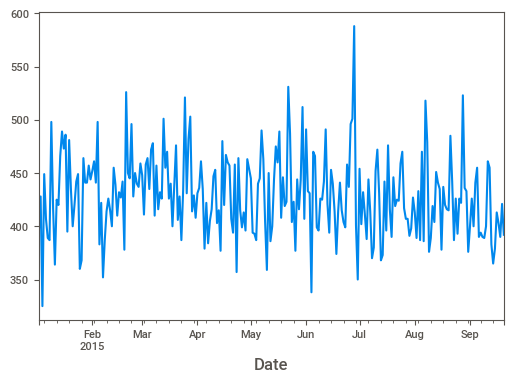

In [285]:
# ANSWER
df.groupby(df.index).size().plot();

#.size() function count the number of elements along a given axis

Using folium we can easily create a map. As it's SF data, by default we are using SF location.

In [286]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location,
        control_scale = True,
        zoom_start = default_zoom_start,
        width = 500, #width of displayed map
        height = 500 #height of displayed map
    )
    
    return base_map

In [287]:
base_map = generateBaseMap(default_location=[37.76, -122.45])
display(base_map)

Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [288]:
df.iloc[0]

IncidntNum                                150827188
Category                               NON-CRIMINAL
Descript               AIDED CASE, MENTAL DISTURBED
DayOfWeek                                    Sunday
Time                                          23:54
PdDistrict                                 RICHMOND
Resolution                                UNFOUNDED
Address                    3000 Block of CLEMENT ST
X                                       -122.491851
Y                                         37.781756
Location      (37.7817557255921, -122.491851328976)
Name: 2015-09-20 00:00:00, dtype: object

In [289]:
df.iloc[0]['Y']

37.7817557255921

In [290]:
# ANSWER

sf = [37.76, -122.45]
base_map = generateBaseMap(default_location = sf)

# Add markers to map
for i in range(0, len(df.head(100))):
    folium.Marker(location=[df.iloc[i]['Y'], df.iloc[i]['X']], popup=df.iloc[i]['Category']).add_to(base_map) #location, popup
display(base_map)

In [291]:
# Save map
base_map.save('sf_incident_map.html')

Add a cricle in the map using `Folium Circle` for first 100 rows of the dataset.

In [292]:
# ANSWER

sf = [37.76, -122.45]
base_map = generateBaseMap(default_location = sf)

# Add circles to map
for i in range(0, len(df.head(100))):
    folium.Circle(location=[df.iloc[i]['Y'], df.iloc[i]['X']], popup=df.iloc[i]['Category'], radius=100).add_to(base_map) #location, popup
base_map

[BONUS] Create a heatmap of the incident happened in SF.

In [293]:
# ANSWER
from folium.plugins import HeatMap

sf = [37.76, -122.45] #lat, long
base_map = generateBaseMap(default_location = sf, default_zoom_start=12)

df['count'] = 1
df.head()

IncidntNum      Category                         Descript  \
Date                                                                    
2015-09-20   150827188  NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED   
2015-09-20   150827213       ASSAULT      INFLICT INJURY ON COHABITEE   
2015-09-20   150827213       ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE   
2015-09-20   150827213       ASSAULT           CHILD ABUSE (PHYSICAL)   
2015-09-20   150827213       ASSAULT              MAYHEM WITH A KNIFE   

           DayOfWeek   Time PdDistrict      Resolution  \
Date                                                     
2015-09-20    Sunday  23:54   RICHMOND       UNFOUNDED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   

                             Address           X          Y  \
Date                                                          
2015-09-20  3000 Block of CLEMENT ST -122.491851  37.781756   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   

                                         Location  count  
Date                                                      
2015-09-20  (37.7817557255921, -122.491851328976)      1  
2015-09-20  (37.7126165766239, -122.413676487435)      1  
2015-09-20  (37.7126165766239, -122.413676487435)      1  
2015-09-20  (37.7126165766239, -122.413676487435)      1  
2015-09-20  (37.7126165766239, -122.413676487435)      1

In [294]:
df[['Y', 'X', 'count']].groupby(['Y', 'X']).sum().reset_index()

Y           X  count
0      37.707879 -122.463626      3
1      37.707968 -122.463545      2
2      37.708003 -122.460832      1
3      37.708031 -122.428737      7
4      37.708083 -122.419241      1
...          ...         ...    ...
17697  37.809671 -122.365565    239
17698  37.814691 -122.370778      2
17699  37.815343 -122.371308     11
17700  37.819923 -122.374397      2
17701  37.819975 -122.374275      2

[17702 rows x 3 columns]

In [295]:
# HeatMap wants a list or np array
df[['Y', 'X', 'count']].groupby(['Y', 'X']).sum().reset_index().values.tolist()[:5]

[[37.7078790224135, -122.463626254961, 3.0],
 [37.7079683645097, -122.463545016819, 2.0],
 [37.7080034569459, -122.460831639621, 1.0],
 [37.7080305204591, -122.428737377557, 7.0],
 [37.7080829769335, -122.419241455647, 1.0]]

In [296]:
# Plot incident heatmap
HeatMap(data = df[['Y', 'X', 'count']].groupby(['Y', 'X']).sum().reset_index().values.tolist(), radium=8, min_opacity=0.01).add_to(base_map)
base_map

**HOMEWORK** Explore Folium as mush as you can.

**HOMEWORK** Explore GeoPandas

# More Resources

<a name="histfootnote">1</a>: [Histogram](https://en.wikipedia.org/wiki/Histogram)

The matplotlib users' guide is at http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/Matplotlib.pdf.

For visualisation ideas and code see https://python-graph-gallery.com/:

# GeoPandas

> The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, 
providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily 
do operations in python that would otherwise require a spatial database such as PostGIS.

[GeoPandas 0.4.0](http://geopandas.org/index.html#)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



